# Лабораторна робота No4
## ФБ-21 Тютюннікова Віолета
### Структури для роботи з великими обсягами даних в Python
### *Мета: отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)*
----
## ( 1 РІВЕНЬ)
----

In [1]:
import pandas as pd
import numpy as np
import timeit
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
print("Все встановлено!")

Все встановлено!


#### Працюватимемо з датафреймом "Individual household electric power consumption Data Set"

In [2]:
names = ['date', 'time', 'global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 
                'sub_metering_2', 'sub_metering_3']

df = pd.read_csv('household_power_consumption.txt', sep=';', header=0, names= names)
print(df.head())

         date      time global_active_power global_reactive_power  voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  global_intensity sub_metering_1 sub_metering_2  sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


/var/folders/sb/sl366d996ss4kv01f83k587h0000gn/T/ipykernel_67181/2116905458.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', sep=';', header=0, names= names)


#### Позбуваємось даних, які містять порожні спостереження та встановлюємо необхідний тип даних:

In [3]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

columns = df.columns.drop(['date', 'time'])
df[columns] = df[columns].astype(float)

print(df.head())

         date      time  global_active_power  global_reactive_power  voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


---
## 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.
---

#### Спочатку зробимо це використовуючи pandas dataframe:

In [4]:
start = timeit.default_timer()
condition1 = df[df['global_active_power'] > 5]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(condition1.head())


Час виконання:  0.0074067499954253435
          date      time  global_active_power  global_reactive_power  voltage  \
1   16/12/2006  17:25:00                5.360                  0.436   233.63   
2   16/12/2006  17:26:00                5.374                  0.498   233.29   
3   16/12/2006  17:27:00                5.388                  0.502   233.74   
11  16/12/2006  17:35:00                5.412                  0.470   232.78   
12  16/12/2006  17:36:00                5.224                  0.478   232.99   

    global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
1               23.0             0.0             1.0            16.0  
2               23.0             0.0             2.0            17.0  
3               23.0             0.0             1.0            17.0  
11              23.2             0.0             1.0            17.0  
12              22.4             0.0             1.0            16.0  


#### Тепер зробимо те саме з використанням numpy array:

In [5]:
start = timeit.default_timer()
array1 = df['global_active_power'].to_numpy()
condition11 = array1 > 5
condition11_df = df[condition11]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(condition11_df.head())


Час виконання:  0.007321750046685338
          date      time  global_active_power  global_reactive_power  voltage  \
1   16/12/2006  17:25:00                5.360                  0.436   233.63   
2   16/12/2006  17:26:00                5.374                  0.498   233.29   
3   16/12/2006  17:27:00                5.388                  0.502   233.74   
11  16/12/2006  17:35:00                5.412                  0.470   232.78   
12  16/12/2006  17:36:00                5.224                  0.478   232.99   

    global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
1               23.0             0.0             1.0            16.0  
2               23.0             0.0             2.0            17.0  
3               23.0             0.0             1.0            17.0  
11              23.2             0.0             1.0            17.0  
12              22.4             0.0             1.0            16.0  


---
## 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.
---

In [6]:
start = timeit.default_timer()
condition2_df = df[df['voltage'] > 235]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(condition2_df.head())


Час виконання:  0.1010245829820633
          date      time  global_active_power  global_reactive_power  voltage  \
4   16/12/2006  17:28:00                3.666                  0.528   235.68   
5   16/12/2006  17:29:00                3.520                  0.522   235.02   
6   16/12/2006  17:30:00                3.702                  0.520   235.09   
7   16/12/2006  17:31:00                3.700                  0.520   235.22   
14  16/12/2006  17:38:00                4.054                  0.422   235.24   

    global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
4               15.8             0.0             1.0            17.0  
5               15.0             0.0             2.0            17.0  
6               15.8             0.0             1.0            17.0  
7               15.8             0.0             1.0            17.0  
14              17.6             0.0             1.0            17.0  


#### Використовуючи numpy array:

In [7]:
start = timeit.default_timer()
voltage = df['voltage'].to_numpy()
condition22 = voltage > 235
condition22_df = df[condition22]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(condition22_df.head())


Час виконання:  0.10398479201830924
          date      time  global_active_power  global_reactive_power  voltage  \
4   16/12/2006  17:28:00                3.666                  0.528   235.68   
5   16/12/2006  17:29:00                3.520                  0.522   235.02   
6   16/12/2006  17:30:00                3.702                  0.520   235.09   
7   16/12/2006  17:31:00                3.700                  0.520   235.22   
14  16/12/2006  17:38:00                4.054                  0.422   235.24   

    global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
4               15.8             0.0             1.0            17.0  
5               15.0             0.0             2.0            17.0  
6               15.8             0.0             1.0            17.0  
7               15.8             0.0             1.0            17.0  
14              17.6             0.0             1.0            17.0  


---
## 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.
---

#### Зробимо використовуючи pandas dataframe:

In [8]:
start = timeit.default_timer()
condition3 = (df['global_intensity'] >= 19) & (df['global_intensity'] <= 20)
condition33_df = df[condition3 & (df['sub_metering_2'] > df['sub_metering_3'])]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(condition33_df.head())


Час виконання:  0.018829833017662168
           date      time  global_active_power  global_reactive_power  \
45   16/12/2006  18:09:00                4.464                  0.136   
460  17/12/2006  01:04:00                4.582                  0.258   
464  17/12/2006  01:08:00                4.618                  0.104   
475  17/12/2006  01:19:00                4.636                  0.140   
476  17/12/2006  01:20:00                4.634                  0.152   

     voltage  global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
45    234.66              19.0             0.0            37.0            16.0  
460   238.08              19.6             0.0            13.0             0.0  
464   239.61              19.6             0.0            27.0             0.0  
475   237.37              19.4             0.0            36.0             0.0  
476   237.17              19.4             0.0            35.0             0.0  


#### Тепер зробимо використовуючи numpy array:

In [9]:
start = timeit.default_timer()
array3 = df['global_intensity'].to_numpy()
condition33 = (array3 >= 19) & (array3 <= 20)
array32 = df['sub_metering_2'].to_numpy()
array33 = df['sub_metering_3'].to_numpy()
condition34 = array32 > array33
condition33_df = df[condition33 & condition34]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(condition33_df.head())


Час виконання:  0.014998208032920957
           date      time  global_active_power  global_reactive_power  \
45   16/12/2006  18:09:00                4.464                  0.136   
460  17/12/2006  01:04:00                4.582                  0.258   
464  17/12/2006  01:08:00                4.618                  0.104   
475  17/12/2006  01:19:00                4.636                  0.140   
476  17/12/2006  01:20:00                4.634                  0.152   

     voltage  global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
45    234.66              19.0             0.0            37.0            16.0  
460   238.08              19.6             0.0            13.0             0.0  
464   239.61              19.6             0.0            27.0             0.0  
475   237.37              19.4             0.0            36.0             0.0  
476   237.17              19.4             0.0            35.0             0.0  


---
## 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії.
---

#### Використовуючи pandas dataframe:

In [10]:
start = timeit.default_timer()
random = np.random.choice(len(df), size=500000, replace=False)
random_df = df.iloc[random]
condition4_df = random_df[['sub_metering_1', 'sub_metering_2', 'sub_metering_3']].mean()
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(condition4_df)


Час виконання:  0.1179736671037972
sub_metering_1    1.118896
sub_metering_2    1.289118
sub_metering_3    6.443458
dtype: float64


#### З використанням numpy array;

In [11]:
start = timeit.default_timer()
df_array = df.to_numpy()
random2 = np.random.choice(len(df_array), size=500000, replace=False)
random_array = df_array[random2]
condition44 = np.mean(random_array[:, 6:9], axis=0)
condition44_df = pd.DataFrame([condition44], columns=df.columns[6:9])
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(condition44_df)


Час виконання:  0.485767874866724
   sub_metering_1  sub_metering_2  sub_metering_3
0        1.123246        1.290086        6.435548


---
## 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.
---

#### Робимо використовуючи pandas dataframe;

In [12]:
start = timeit.default_timer()
condition5_df = df[(df['time'] > '18:00:00') & (df['global_active_power'] > 6)]

condition5_df = condition5_df[(condition5_df['sub_metering_2'] > condition5_df['sub_metering_1']) & 
                          (condition5_df['sub_metering_2'] > condition5_df['sub_metering_3'])]

first = condition5_df.iloc[:len(condition5_df)//2:3]
second = condition5_df.iloc[len(condition5_df)//2::4]
result = pd.concat([first, second])
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(result.head())


Час виконання:  0.08442004187963903
             date      time  global_active_power  global_reactive_power  \
41     16/12/2006  18:05:00                6.052                  0.192   
44     16/12/2006  18:08:00                6.308                  0.116   
17494  28/12/2006  20:58:00                6.386                  0.374   
17498  28/12/2006  21:02:00                8.088                  0.262   
17501  28/12/2006  21:05:00                7.230                  0.152   

       voltage  global_intensity  sub_metering_1  sub_metering_2  \
41      232.93              26.2             0.0            37.0   
44      232.25              27.0             0.0            36.0   
17494   236.63              27.0             1.0            36.0   
17498   235.50              34.4             1.0            72.0   
17501   235.22              30.6             1.0            73.0   

       sub_metering_3  
41               17.0  
44               17.0  
17494            17.0  
17498  

#### Використовуючи numpy array:

In [13]:
start = timeit.default_timer()
time = (df['time'] > '18:00:00').to_numpy()
power = (df['global_active_power'] > 6).to_numpy()
condition1 = (df['sub_metering_2'] > df['sub_metering_1']).to_numpy()
condition2 = (df['sub_metering_2'] > df['sub_metering_3']).to_numpy()

filtered = np.where(time & power & condition1 & condition2)[0]
filtered_df = df.iloc[filtered]

first2 = filtered[:len(filtered)//2:3]
first2_df = df.iloc[first2]

second2 = filtered[len(filtered)//2::4]
second2_df = df.iloc[second2]

result2 = pd.concat([first2_df, second2_df])
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(result2.head())


Час виконання:  0.08946045907214284
             date      time  global_active_power  global_reactive_power  \
41     16/12/2006  18:05:00                6.052                  0.192   
44     16/12/2006  18:08:00                6.308                  0.116   
17494  28/12/2006  20:58:00                6.386                  0.374   
17498  28/12/2006  21:02:00                8.088                  0.262   
17501  28/12/2006  21:05:00                7.230                  0.152   

       voltage  global_intensity  sub_metering_1  sub_metering_2  \
41      232.93              26.2             0.0            37.0   
44      232.25              27.0             0.0            36.0   
17494   236.63              27.0             1.0            36.0   
17498   235.50              34.4             1.0            72.0   
17501   235.22              30.6             1.0            73.0   

       sub_metering_3  
41               17.0  
44               17.0  
17494            17.0  
17498  

----
## ( 2 РІВЕНЬ)
----

#### Першим кроком є вибір датасету. Було обрано датасет "Automobile", який відповідає всім вимогам. У датасеті  наявні наступні колонки:
#### ‣symboling *(Оцінка ризику. Це категоріальна оцінка, яка вказує на ступінь ризику страхового випадку. Від'ємні значення означають, що автомобіль має менш ніж середній ризик, а позитивні значення - більший ризик.)*
#### ‣normalized-losses: *(Нормалізовані збитки. Це числове значення, яке вказує на середній обсяг збитків страхових виплат за рік для цього типу автомобіля)*        
#### ‣make: *(Виробник автомобіля)*                    
#### ‣fuel-type: *(Тип палива, яке використовується в автомобілі (дизель або бензин))*             
#### ‣aspiration: *(Тип наддува двигуна (стандартний або турбонаддув)*         
#### ‣num-of-doors: *(Кількість дверей автомобіля)*     
#### ‣body-style: *(Стиль кузова автомобіля)*      
#### ‣drive-wheels: *(Тип приводу коліс (4wd - повний привід, fwd - передній привід, rwd - задній привід))*           
#### ‣engine-location: *( Розташування двигуна (переднє або заднє))*       
#### ‣wheel-base: *(Відстань між передньою і задньою віссю автомобіля)*         
#### ‣length: *(Довжина)*                
#### ‣width: *(Ширина)*      
#### ‣height: *(Висота)*               
#### ‣curb-weight: *(Вага автомобіля без пасажирів або вантажу)*        
#### ‣engine-type: *(Тип двигуна)*       
#### ‣num-of-cylinders: *(Кількість циліндрів у двигуні)*        
#### ‣engine-size: *(Об'єм двигуна)*              
#### ‣fuel-system: *(Система подачі палива до двигуна)*           
#### ‣bore: *(Діаметр поршня)*       
#### ‣stroke: *(Хід поршня)*                 
#### ‣compression-ratio: *(Стиснення паливно-повітряної суміші у циліндрах)*        
#### ‣horsepower: *(Кінські сили (потужність двигуна))* 
#### ‣peak-rpm: *(Максимальна обертова частота)*            
#### ‣city-mpg: *(Розхід палива у місті )*       
#### ‣highway-mpg: *(Розхід палива на трасі)*
#### ‣price: *(Ціна автомобіля)*

In [14]:
headers = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
           'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg','price']
df = pd.read_csv('automobile/imports-85.data', names=headers)
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

---
## 1. Поборотися із зниклими даними.
---
#### Шукаємо стовбці зі зниклими даними (позначаються "?").

In [15]:
nan = df.columns[df.eq('?').any()]

print("Зниклі дані наявні у:", nan)

Зниклі дані наявні у: Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')


#### Отже, ми визначили стовбці з втраченими даними.
#### Перший спосіб позбутися втрачених даних це просто видалити рядки, що їх містять. Зробимо це використовуючи dataframe (робимо на копії початкового датафрейму, щоб не впливати на подальші варіанти обробки втрачених даних):

In [16]:
df_copy1 = df.copy()
start = timeit.default_timer()

df_copy1.replace('?', np.nan, inplace=True)
df_copy1.dropna(inplace=True)

stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)

print(df_copy1.head())


Час виконання:  0.0033015829976648092
    symboling normalized-losses  make fuel-type aspiration num-of-doors  \
3           2               164  audi       gas        std         four   
4           2               164  audi       gas        std         four   
6           1               158  audi       gas        std         four   
8           1               158  audi       gas      turbo         four   
10          2               192   bmw       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
3       sedan          fwd           front        99.8  ...          109   
4       sedan          4wd           front        99.4  ...          136   
6       sedan          fwd           front       105.8  ...          136   
8       sedan          fwd           front       105.8  ...          131   
10      sedan          rwd           front       101.2  ...          108   

    fuel-system  bore  stroke compression-ratio horse

#### Тепер також видалимо рядки, в якіх наявні втрачені дані використовуючи numpy array.

In [17]:
df_copy2 = df.copy()
start = timeit.default_timer()

df_copy2.replace('?', np.nan, inplace=True)

array = df_copy2.to_numpy()
array_clean = array[~pd.isna(array).any(axis=1)]
cleaned_df = pd.DataFrame(array_clean, columns=headers)

stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(cleaned_df.head())


Час виконання:  0.00305954203940928
  symboling normalized-losses  make fuel-type aspiration num-of-doors  \
0         2               164  audi       gas        std         four   
1         2               164  audi       gas        std         four   
2         1               158  audi       gas        std         four   
3         1               158  audi       gas      turbo         four   
4         2               192   bmw       gas        std          two   

  body-style drive-wheels engine-location wheel-base  ... engine-size  \
0      sedan          fwd           front       99.8  ...         109   
1      sedan          4wd           front       99.4  ...         136   
2      sedan          fwd           front      105.8  ...         136   
3      sedan          fwd           front      105.8  ...         131   
4      sedan          rwd           front      101.2  ...         108   

  fuel-system  bore stroke compression-ratio horsepower peak-rpm city-mpg  \
0       

#### Тепер вирішимо проблему з втраченими даними шляхом їх заповнення. Для цього будемо знаходити моду кожного стовбчика, у якому наявні втрачені дані (і відповідно замінемо усі nan на значення моди). Спочатку робимо це використовуючи pandas dataframe:

In [18]:
df_copy3 = df.copy()

columns = ['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
start = timeit.default_timer()
df_copy3.replace('?', np.nan, inplace=True)

for column in columns:
    df_copy3[column] = df_copy3[column].fillna(df_copy3[column].mode()[0])
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(df_copy3.head())


Час виконання:  0.006853834027424455
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               161  alfa-romero       gas        std          two   
1          3               161  alfa-romero       gas        std          two   
2          1               161  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-syst

#### Тепер використаємо numpy array:

In [19]:
columns = ['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
start = timeit.default_timer()
df[columns] = df[columns].replace('?', np.nan)

for column in columns:
    array2 = df[column].to_numpy()
    unique = pd.Series(array2).value_counts()
    mode = unique.idxmax()
    values = np.where(pd.isnull(array2), mode, array2)
    df[column] = values
stop = timeit.default_timer()    

print("\nЧас виконання: ", stop - start)
print(df.head())


Час виконання:  0.007398624904453754
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               161  alfa-romero       gas        std          two   
1          3               161  alfa-romero       gas        std          two   
2          1               161  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-syst

---
## 2. Пронормувати вибраний датасет або стандартизувати його
---

In [20]:
num_columns = df.select_dtypes(include=['int', 'float'])

print("Числові стовбці:")
print(num_columns)

Числові стовбці:
     symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0            3        88.6   168.8   64.1    48.8         2548          130   
1            3        88.6   168.8   64.1    48.8         2548          130   
2            1        94.5   171.2   65.5    52.4         2823          152   
3            2        99.8   176.6   66.2    54.3         2337          109   
4            2        99.4   176.6   66.4    54.3         2824          136   
..         ...         ...     ...    ...     ...          ...          ...   
200         -1       109.1   188.8   68.9    55.5         2952          141   
201         -1       109.1   188.8   68.8    55.5         3049          141   
202         -1       109.1   188.8   68.9    55.5         3012          173   
203         -1       109.1   188.8   68.9    55.5         3217          145   
204         -1       109.1   188.8   68.9    55.5         3062          141   

     compression-ratio  city-mpg  

#### Спочатку пронормуємо та стандартизуємо датасет використовуючи pandas dataframe:

In [22]:
# нормалізація
start = timeit.default_timer()
for column in num_columns:
    min = df_copy3[column].min()
    max = df_copy3[column].max()
    normalized = (df_copy3[column] - min) / (max - min)
    df_copy3[column] = normalized
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print("Нормалізований датафрейм:")
print(df_copy3.head())

# стандартизація
start = timeit.default_timer()
for column in num_columns:
    mean = df_copy3[column].mean()
    std = df_copy3[column].std()
    standardized = (df_copy3[column] - mean) / std
    df_copy3[column] = standardized
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print("Стандартизований датафрейм:")
print(df_copy3.head())


Час виконання:  0.00538612506352365
Нормалізований датафрейм:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0        1.0               161  alfa-romero       gas        std          two   
1        1.0               161  alfa-romero       gas        std          two   
2        0.6               161  alfa-romero       gas        std          two   
3        0.8               164         audi       gas        std         four   
4        0.8               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front    0.058309  ...     0.260377   
1  convertible          rwd           front    0.058309  ...     0.260377   
2    hatchback          rwd           front    0.230321  ...     0.343396   
3        sedan          fwd           front    0.384840  ...     0.181132   
4        sedan          4wd           front    0.373178  ...     

#### Тепер зробимо те саме з numpy array:

In [23]:
# стандартизація
start = timeit.default_timer()
for column in num_columns:
    array = df[column].to_numpy()
    mean1 = np.mean(array)
    std1 = np.std(array)
    standardized1 = (array - mean1) / std1
    df[column] = standardized1
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print("Стандартизований датафрейм):")
print(df.head())

# нормалізація
start = timeit.default_timer()
for column in num_columns:
    array = df[column].to_numpy()
    min1 = np.min(array)
    max1 = np.max(array)
    normalized1 = (array - min1) / (max1 - min1)
    df[column] = normalized1
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print("Нормалізований датафрейм):")
print(df.head())


Час виконання:  0.003690832993015647
Стандартизований датафрейм):
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0   1.743470               161  alfa-romero       gas        std          two   
1   1.743470               161  alfa-romero       gas        std          two   
2   0.133509               161  alfa-romero       gas        std          two   
3   0.938490               164         audi       gas        std         four   
4   0.938490               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front   -1.690772  ...     0.074449   
1  convertible          rwd           front   -1.690772  ...     0.074449   
2    hatchback          rwd           front   -0.708596  ...     0.604046   
3        sedan          fwd           front    0.173698  ...    -0.431076   
4        sedan          4wd           front    0.107110  ... 

---
## 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
---

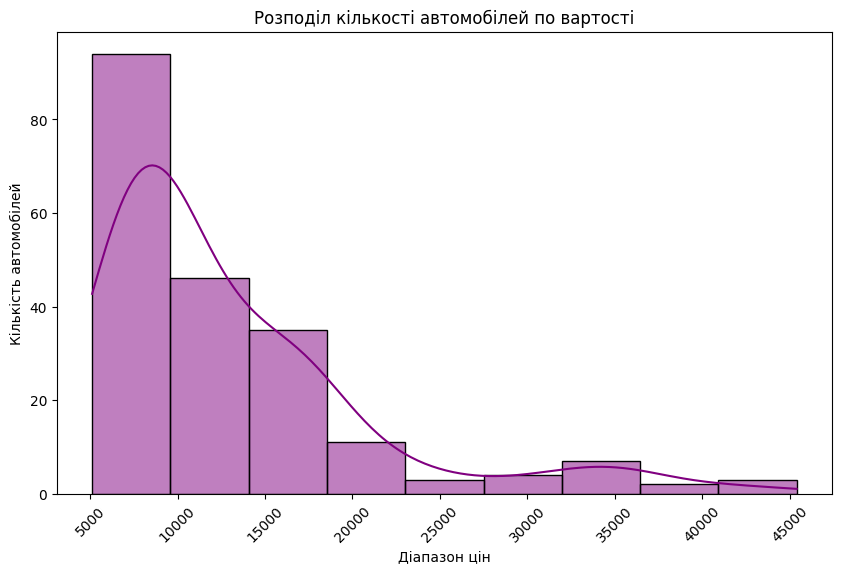

In [27]:
df['price'] = pd.to_numeric(df['price'])
min_price = df['price'].min()
max_price = df['price'].max()
price_ranges = np.linspace(min_price, max_price, 10)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=price_ranges, kde=True, color='purple')
plt.xlabel('Діапазон цін')
plt.ylabel('Кількість автомобілей')
plt.title('Розподіл кількості автомобілей по вартості')
plt.xticks(rotation=45)
plt.show()

---
## 4. Збудувати графік залежності одного integer/real атрибута від іншого.
---

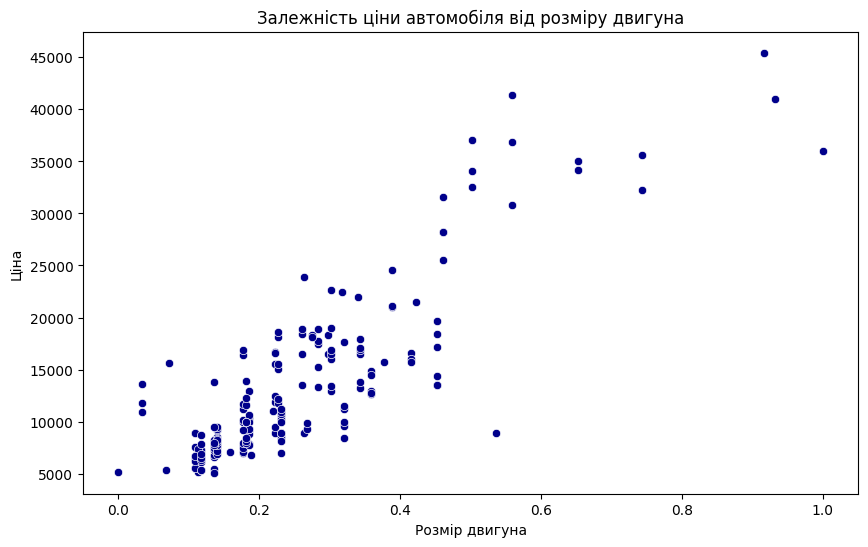

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engine-size', y='price', color='darkblue')
plt.xlabel('Розмір двигуна')
plt.ylabel('Ціна')
plt.title('Залежність ціни автомобіля від розміру двигуна')
plt.show()

---
## 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.
---


#### Порахуємо використовуючи pandas dataframe:

In [25]:
start = timeit.default_timer()
x = df['engine-size']
y = df['price']

pearson, _ = pearsonr(x, y)
spearman, _ = spearmanr(x, y)
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print("Коефіцієнт Пірсона:", pearson)
print("Коефіцієнт Спірсона:", spearman)


Час виконання:  0.007447042036801577
Коефіцієнт Пірсона: 0.8588976096026002
Коефіцієнт Спірсона: 0.8127168310168846


#### Тепер використаємо numpy array:

In [26]:
start = timeit.default_timer()
x2 = df['engine-size'].to_numpy()
y2 = df['price'].to_numpy()

pearson2, _ = pearsonr(x2, y2)
spearman2, _ = spearmanr(x2, y2)
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print("Коефіцієнт Пірсона:", pearson2)
print("Коефіцієнт Спірсона:", spearman2)


Час виконання:  0.004044499946758151
Коефіцієнт Пірсона: 0.8588976096026002
Коефіцієнт Спірсона: 0.8127168310168846


---
## 6. Провести One Hot Encoding категоріального string атрибуту.
---

#### Спочатку робимо використовуючи numpy array:

In [27]:
df_copy7 = df.copy()

start = timeit.default_timer()
data = np.array(df_copy7['body-style']).reshape(-1, 1)
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(data).toarray()

df_result = pd.DataFrame(x, columns=onehotencoder.get_feature_names_out(['body-style']))
df_copy7 = pd.concat([df_copy7, df_result], axis=1)
df_copy7.drop('body-style', axis=1, inplace=True)
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print(df_copy7.head())
print(x)


Час виконання:  0.0038313339464366436
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0        1.0               161  alfa-romero       gas        std          two   
1        1.0               161  alfa-romero       gas        std          two   
2        0.6               161  alfa-romero       gas        std          two   
3        0.8               164         audi       gas        std         four   
4        0.8               164         audi       gas        std         four   

  drive-wheels engine-location  wheel-base    length  ...  horsepower  \
0          rwd           front    0.058309  0.413433  ...         111   
1          rwd           front    0.058309  0.413433  ...         111   
2          rwd           front    0.230321  0.449254  ...         154   
3          fwd           front    0.384840  0.529851  ...         102   
4          4wd           front    0.373178  0.529851  ...         115   

   peak-rpm  city-mpg highway-mpg  

#### Тепер робимо з використанням pandas dataframe:

In [28]:
df_copy8 = df.copy()

start = timeit.default_timer()
onehotencoder = OneHotEncoder()
x2 = onehotencoder.fit_transform(df_copy8[['body-style']]).toarray()

df_result = pd.DataFrame(x2, columns=onehotencoder.get_feature_names_out(['body-style']))

df_copy8 = pd.concat([df_copy8, df_result], axis=1)
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print(df_copy8.head())
print(x2)



Час виконання:  0.0038090411107987165
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0        1.0               161  alfa-romero       gas        std          two   
1        1.0               161  alfa-romero       gas        std          two   
2        0.6               161  alfa-romero       gas        std          two   
3        0.8               164         audi       gas        std         four   
4        0.8               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  horsepower  \
0  convertible          rwd           front    0.058309  ...         111   
1  convertible          rwd           front    0.058309  ...         111   
2    hatchback          rwd           front    0.230321  ...         154   
3        sedan          fwd           front    0.384840  ...         102   
4        sedan          4wd           front    0.373178  ...         115   

   peak-rpm  city

---
## 7. Провести візуалізацію багатовимірних даних.
---

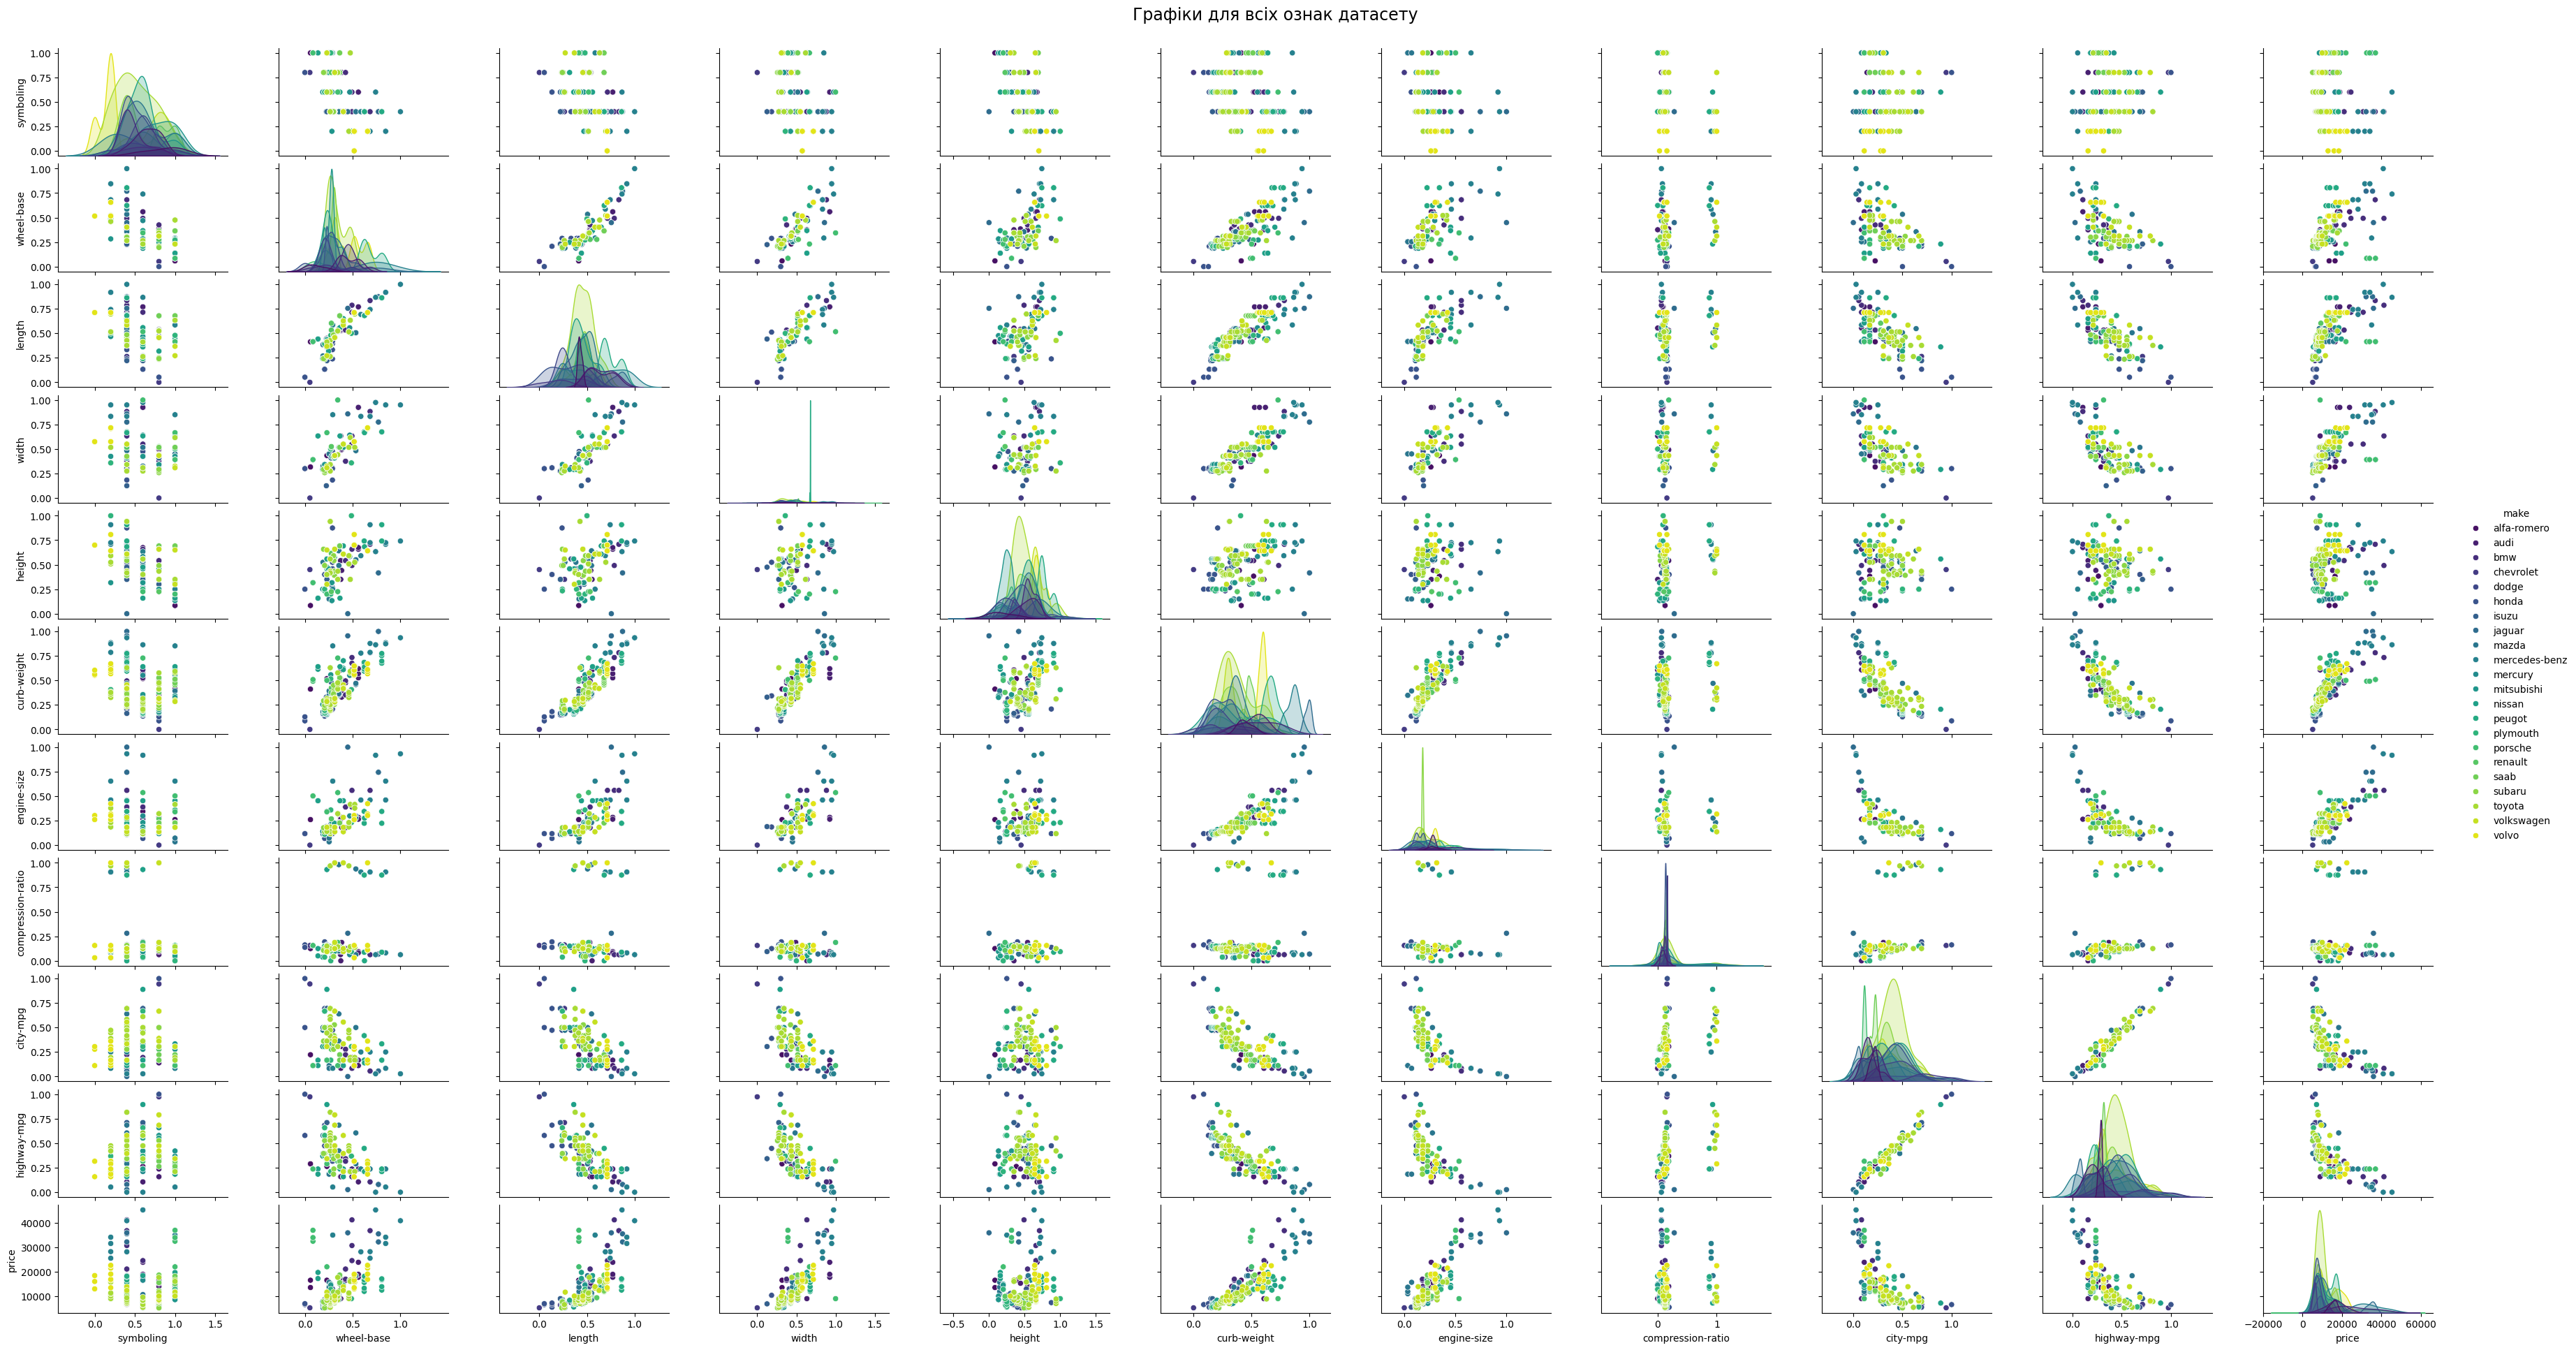

In [31]:
cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
           'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg','price']
graphic = sns.pairplot(df[cols], hue='make', height=1.8, aspect=1.8, palette='viridis')
fig = graphic.fig 
fig.subplots_adjust(top=0.95, wspace=0.3)
title = fig.suptitle('Графіки для всіх ознак датасету', fontsize=17)

plt.show()